In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np

import matplotlib as mpl
mpl.rcParams['text.usetex'] = True

df1 = pd.read_csv('datasets/control/dataset_2024-05-17_21-00_50x_48C_6-conc.csv')
df1['group'] = 'control'
df1['source'] = '$PNode1$'

df2 = pd.read_csv('datasets/control/dataset_2024-05-18_21-00_50x_44C_6-conc.csv')
df2['group'] = 'control'
df2['source'] = '$PNode2$'

df3 = pd.read_csv('datasets/experimental/dataset_2024-05-19_21-00_50x_48C_6-conc.csv')
df3['group'] = 'experimental'
df3['source'] = '$PNode1$'

df4 = pd.read_csv('datasets/experimental/dataset_2024-05-20_21-00_50x_44C_6-conc.csv')
df4['group'] = 'experimental'
df4['source'] = '$PNode2$'


df = pd.concat([df1, df2, df3, df4])
df.reset_index(drop=True, inplace=True)

for column in df.filter(like='_avg_watts_consumption').columns:
    prefix = column.split('_avg_watts_consumption')[0]

    duration = df[f'pipeline_duration']
    watts = df[column]


    duration = duration if prefix == 'cicd_server' else duration+1.385
    df[f'{prefix}_joules_consumption'] = watts * duration

df

,project_id,pipeline_id,pipeline_start,pipeline_finish,pipeline_duration,cicd_server_avg_watts_consumption,monitoring_pc_avg_watts_consumption,group,source,cicd_server_joules_consumption,monitoring_pc_joules_consumption
0,21,1850,1715972412,1715972802,390,58.407068,14.490311,control,$PNode1$,22778.756620,5671.290461
1,21,1851,1715973439,1715973865,426,51.022359,14.414289,control,$PNode1$,21735.525066,6160.451014
2,21,1852,1715974525,1715974906,381,51.422157,14.701992,control,$PNode1$,19591.841827,5621.821100
3,21,1853,1715975551,1715975927,376,52.517628,14.627342,control,$PNode1$,19746.627982,5520.139450
4,21,1854,1715976577,1715976970,393,50.339940,14.966652,control,$PNode1$,19783.596430,5902.623059
...,...,...,...,...,...,...,...,...,...,...,...
195,8,2802,1716256955,1716257484,529,69.608703,14.358698,experimental,$PNode2$,36823.003857,7615.638119
196,8,2803,1716257502,1716258036,534,68.657908,14.751601,experimental,$PNode2$,36663.323001,7897.786093
197,8,2804,1716258049,1716258577,528,69.456789,14.772292,experimental,$PNode2$,36673.184751,7820.229840
198,8,2805,1716258596,1716259121,525,69.268529,14.755422,experimental,$PNode2$,36365.977563,7767.032680


In [2]:
import seaborn as sns

colors = sns.color_palette("deep")

Split dataset into 2 pcs

In [3]:
node1 = df[df['source'] == '$PNode1$']
node2 = df[df['source'] == '$PNode2$']

Std and mean of monitoring pc power consumption

In [4]:
print("Std", df['monitoring_pc_avg_watts_consumption'].std())
print("Mean", df['monitoring_pc_avg_watts_consumption'].mean())

Std 0.1635850749868395
Mean 14.510672071416368


In [5]:
print("Std", node1['monitoring_pc_avg_watts_consumption'].std())
print("Mean", node1['monitoring_pc_avg_watts_consumption'].mean())
print()
print("Std", node2['monitoring_pc_avg_watts_consumption'].std())
print("Mean", node2['monitoring_pc_avg_watts_consumption'].mean())

Std 0.19051499596555455
Mean 14.553337621556295

Std 0.1175458232631793
Mean 14.468006521276441


Data PC1 with outliers

In [6]:
print("Control; CI/CD; Std", node1[node1['group'] == 'control']['cicd_server_joules_consumption'].std())
print("Control; Monitoring; Std", node1[node1['group'] == 'control']['monitoring_pc_joules_consumption'].std())
print()
print("Control; CI/CD; Mean", node1[node1['group'] == 'control']['cicd_server_joules_consumption'].mean())
print("Control; Monitoring; Mean", node1[node1['group'] == 'control']['monitoring_pc_joules_consumption'].mean())
print()
print("Experimental; CI/CD; Std", node1[node1['group'] == 'experimental']['cicd_server_joules_consumption'].std())
print("Experimental; Monitoring; Std", node1[node1['group'] == 'experimental']['monitoring_pc_joules_consumption'].std())
print()
print("Experimental; CI/CD; Mean", node1[node1['group'] == 'experimental']['cicd_server_joules_consumption'].mean())
print("Experimental; Monitoring; Mean", node1[node1['group'] == 'experimental']['monitoring_pc_joules_consumption'].mean())

Control; CI/CD; Std 1343.8590544168894
Control; Monitoring; Std 267.80201709461943

Control; CI/CD; Mean 19242.908595124376
Control; Monitoring; Mean 5532.263551658166

Experimental; CI/CD; Std 680.5260791156087
Experimental; Monitoring; Std 211.03567944890776

Experimental; CI/CD; Mean 18883.412260613175
Experimental; Monitoring; Mean 5488.28936406563


Boxplot for PC1 WITH outliers

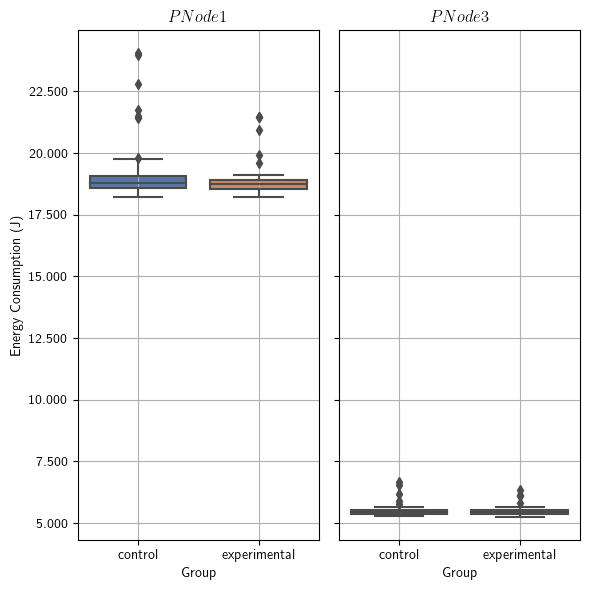

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(6, 6), sharey=True)

# Plot for Node 1
sns.boxplot(x='group', y='cicd_server_joules_consumption', data=node1,
            ax=axes[0], linewidth=1.5, palette='deep')
axes[0].set_title('$PNode1$')
axes[0].set_xlabel('Group')
axes[0].set_ylabel('Energy Consumption (J)')
axes[0].grid(True)

sns.boxplot(x='group', y='monitoring_pc_joules_consumption', data=node1,
            ax=axes[1], linewidth=1.5, palette='deep')
axes[1].set_title('$PNode3$')
axes[1].set_xlabel('Group')
axes[1].set_ylabel('')

axes[1].set_ylim(axes[0].get_ylim())
axes[1].grid(True)

axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{x:,.0f}'.replace(',', '*').replace('.', ',').replace('*', '.')))
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{x:,.0f}'.replace(',', '*').replace('.', ',').replace('*', '.')))

plt.tight_layout()
plt.savefig('outliers-1-3.pdf', dpi=300)
plt.show()

Data PC2 with outliers

In [8]:
print("Control; CI/CD; Std", node2[node2['group'] == 'control']['cicd_server_joules_consumption'].std())
print("Control; Monitoring; Std", node2[node2['group'] == 'control']['monitoring_pc_joules_consumption'].std())
print()
print("Control; CI/CD; Mean", node2[node2['group'] == 'control']['cicd_server_joules_consumption'].mean())
print("Control; Monitoring; Mean", node2[node2['group'] == 'control']['monitoring_pc_joules_consumption'].mean())
print()
print("Experimental; CI/CD; Std", node2[node2['group'] == 'experimental']['cicd_server_joules_consumption'].std())
print("Experimental; Monitoring; Std", node2[node2['group'] == 'experimental']['monitoring_pc_joules_consumption'].std())
print()
print("Experimental; CI/CD; Mean", node2[node2['group'] == 'experimental']['cicd_server_joules_consumption'].mean())
print("Experimental; Monitoring; Mean", node2[node2['group'] == 'experimental']['monitoring_pc_joules_consumption'].mean())

Control; CI/CD; Std 3646.1986340918834
Control; Monitoring; Std 343.4922582108172

Control; CI/CD; Mean 37823.60501857346
Control; Monitoring; Mean 7787.443863158982

Experimental; CI/CD; Std 2260.829288731635
Experimental; Monitoring; Std 261.6314079284055

Experimental; CI/CD; Mean 37113.90436050505
Experimental; Monitoring; Mean 7732.893601413086


Boxplot for PC2 WITH outliers

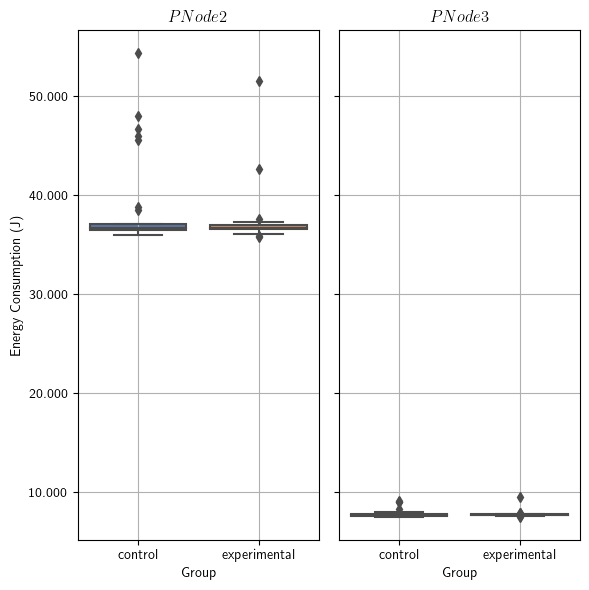

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(6, 6), sharey=True)

# Plot for Node 2
sns.boxplot(x='group', y='cicd_server_joules_consumption', data=node2,
            ax=axes[0], linewidth=1.5, palette='deep')
axes[0].set_title('$PNode2$')
axes[0].set_xlabel('Group')
axes[0].set_ylabel('Energy Consumption (J)')
axes[0].grid(True)

sns.boxplot(x='group', y='monitoring_pc_joules_consumption', data=node2,
            ax=axes[1], linewidth=1.5, palette='deep')
axes[1].set_title('$PNode3$')
axes[1].set_xlabel('Group')
axes[1].set_ylabel('')

axes[1].set_ylim(axes[0].get_ylim())
axes[1].grid(True)

axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{x:,.0f}'.replace(',', '*').replace('.', ',').replace('*', '.')))
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{x:,.0f}'.replace(',', '*').replace('.', ',').replace('*', '.')))

plt.tight_layout()
plt.savefig('outliers-2-3.pdf', dpi=300)
plt.show()

IQR

In [10]:
from matplotlib.cbook import boxplot_stats

def get_iqr_range(df, group):
    stats = boxplot_stats(df[df['group'] == group]['cicd_server_joules_consumption'])

    Q1 = stats[0]['q1']
    Q3 = stats[0]['q3']
        
    IQR = Q3 - Q1
    max = Q3 + 1.5 * IQR
    min = Q1 - 1.5 * IQR

    return min, max

PC1 control & experimental WITH outliers

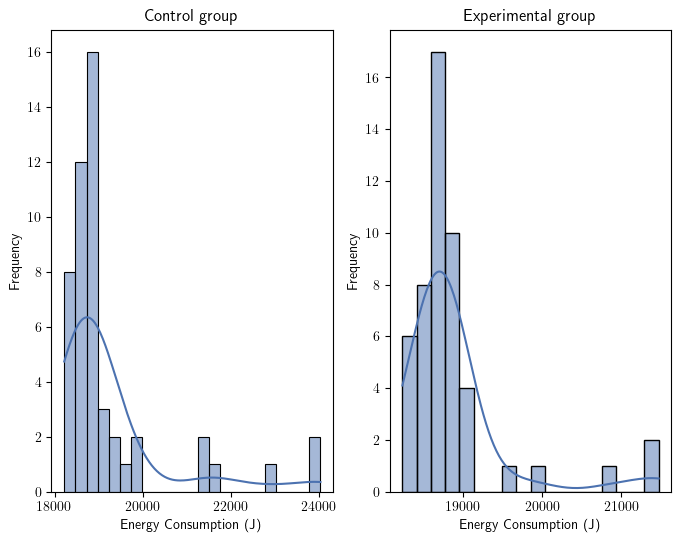

In [11]:
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
#hist = node1[node1['group'] == 'control']['cicd_server_joules_consumption'].hist(figsize=(6,6), color=colors[0])
sns.histplot(node1[node1['group'] == 'control']['cicd_server_joules_consumption'], color=colors[0], kde=True)
plt.xlabel('Energy Consumption (J)')
plt.ylabel('Frequency')
plt.title('Control group')

plt.subplot(1, 2, 2)
#hist = node1[node1['group'] == 'experimental']['cicd_server_joules_consumption'].hist(figsize=(6,6), color=colors[0])
sns.histplot(node1[node1['group'] == 'experimental']['cicd_server_joules_consumption'], color=colors[0], kde=True)
plt.xlabel('Energy Consumption (J)')
plt.ylabel('Frequency')
plt.title('Experimental group')

plt.show()

PC2 control & experimental WITH outliers

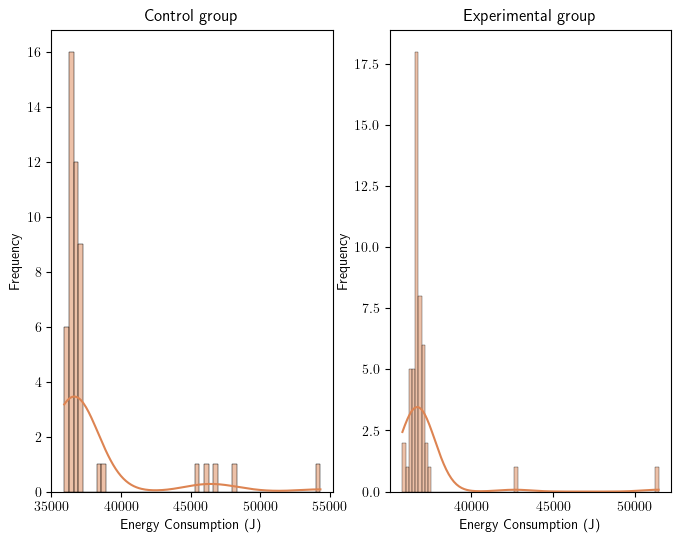

In [12]:
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
#hist = node2[node2['group'] == 'control']['cicd_server_joules_consumption'].hist(figsize=(6,6), color=colors[0])
sns.histplot(node2[node2['group'] == 'control']['cicd_server_joules_consumption'], color=colors[1], kde=True)
plt.xlabel('Energy Consumption (J)')
plt.ylabel('Frequency')
plt.title('Control group')

plt.subplot(1, 2, 2)
#hist = node2[node2['group'] == 'experimental']['cicd_server_joules_consumption'].hist(figsize=(6,6), color=colors[0])
sns.histplot(node2[node2['group'] == 'experimental']['cicd_server_joules_consumption'], color=colors[1], kde=True)
plt.xlabel('Energy Consumption (J)')
plt.ylabel('Frequency')
plt.title('Experimental group')

plt.show()

PC1 remove outliers

In [13]:
pc1_c = get_iqr_range(node1, 'control')
pc1_e = get_iqr_range(node1, 'experimental')

pc1_no_outliers_c = node1[node1['group'] == 'control'][(node1['cicd_server_joules_consumption'] >= pc1_c[0]) & (node1['cicd_server_joules_consumption'] <= pc1_c[1])]
print("Removed from control:", 50-len(pc1_no_outliers_c))

pc1_no_outliers_e = node1[node1['group'] == 'experimental'][(node1['cicd_server_joules_consumption'] >= pc1_e[0]) & (node1['cicd_server_joules_consumption'] <= pc1_e[1])]
print("Removed from experimental:", 50-len(pc1_no_outliers_e))

pc1_no_outliers = pd.concat([pc1_no_outliers_c, pc1_no_outliers_e])

Removed from control: 7
Removed from experimental: 5


/tmp/ipykernel_124549/967862369.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pc1_no_outliers_c = node1[node1['group'] == 'control'][(node1['cicd_server_joules_consumption'] >= pc1_c[0]) & (node1['cicd_server_joules_consumption'] <= pc1_c[1])]
/tmp/ipykernel_124549/967862369.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pc1_no_outliers_e = node1[node1['group'] == 'experimental'][(node1['cicd_server_joules_consumption'] >= pc1_e[0]) & (node1['cicd_server_joules_consumption'] <= pc1_e[1])]


PC2 remove outliers

In [14]:
pc2_c = get_iqr_range(node2, 'control')
pc2_e = get_iqr_range(node2, 'experimental')

pc2_no_outliers_c = node2[node2['group'] == 'control'][(node2['cicd_server_joules_consumption'] >= pc2_c[0]) & (node2['cicd_server_joules_consumption'] <= pc2_c[1])]
print("Removed from control:", 50-len(pc2_no_outliers_c))

pc2_no_outliers_e = node2[node2['group'] == 'experimental'][(node2['cicd_server_joules_consumption'] >= pc2_e[0]) & (node2['cicd_server_joules_consumption'] <= pc2_e[1])]
print("Removed from experimental:", 50-len(pc2_no_outliers_e))

pc2_no_outliers = pd.concat([pc2_no_outliers_c, pc2_no_outliers_e])

Removed from control: 7
Removed from experimental: 5


/tmp/ipykernel_124549/1521749098.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pc2_no_outliers_c = node2[node2['group'] == 'control'][(node2['cicd_server_joules_consumption'] >= pc2_c[0]) & (node2['cicd_server_joules_consumption'] <= pc2_c[1])]
/tmp/ipykernel_124549/1521749098.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pc2_no_outliers_e = node2[node2['group'] == 'experimental'][(node2['cicd_server_joules_consumption'] >= pc2_e[0]) & (node2['cicd_server_joules_consumption'] <= pc2_e[1])]


PC1 control & experimental WITHOUT outliers

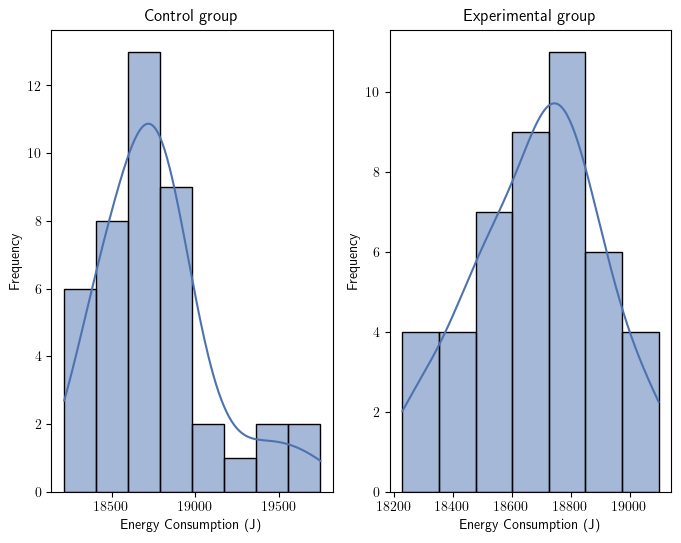

In [15]:
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
#pc1_hist_c = pc1_no_outliers_c['cicd_server_joules_consumption'].hist(figsize=(6,6), color=colors[0])
sns.histplot(pc1_no_outliers_c['cicd_server_joules_consumption'], color=colors[0], kde=True)
plt.xlabel('Energy Consumption (J)')
plt.ylabel('Frequency')
plt.title('Control group')

plt.subplot(1, 2, 2)
#pc1_hist_e = pc1_no_outliers_e['cicd_server_joules_consumption'].hist(figsize=(6,6), color=colors[0])
sns.histplot(pc1_no_outliers_e['cicd_server_joules_consumption'], color=colors[0], kde=True)
plt.xlabel('Energy Consumption (J)')
plt.ylabel('Frequency')
plt.title('Experimental group')

plt.show()

PC2 control & experimental WITHOUT outliers

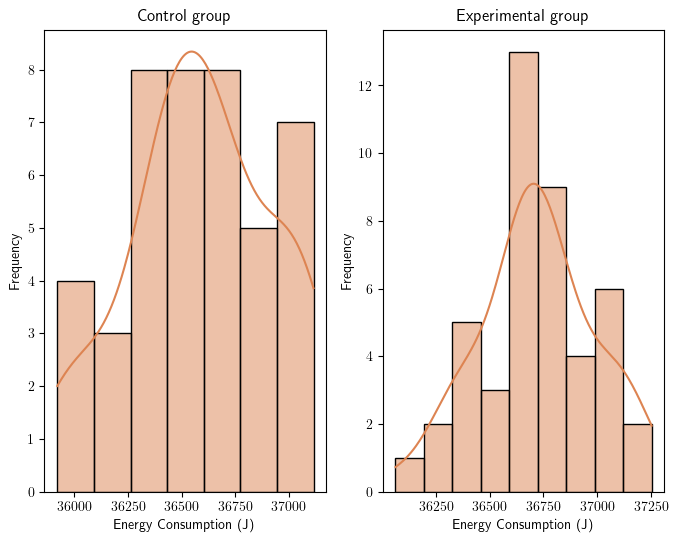

In [16]:
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
#pc2_hist_c = pc2_no_outliers_c['cicd_server_joules_consumption'].hist(figsize=(6,6), color=colors[0])
sns.histplot(pc2_no_outliers_c['cicd_server_joules_consumption'], color=colors[1], kde=True)
plt.xlabel('Energy Consumption (J)')
plt.ylabel('Frequency')
plt.title('Control group')

plt.subplot(1, 2, 2)
#pc2_hist_e = pc2_no_outliers_e['cicd_server_joules_consumption'].hist(figsize=(6,6), color=colors[0])
sns.histplot(pc2_no_outliers_e['cicd_server_joules_consumption'], color=colors[1], kde=True)
plt.xlabel('Energy Consumption (J)')
plt.ylabel('Frequency')
plt.title('Experimental group')

plt.show()

Boxplot for PC1 WITHOUT outliers

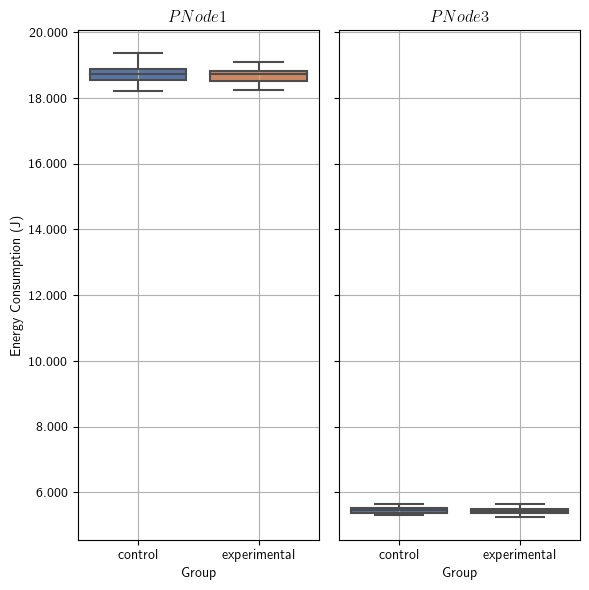

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(6, 6), sharey=True)

# Plot for Node 1
sns.boxplot(x='group', y='cicd_server_joules_consumption', data=pc1_no_outliers,
            ax=axes[0], linewidth=1.5, palette='deep', showfliers=False)
axes[0].set_title('$PNode1$')
axes[0].set_xlabel('Group')
axes[0].set_ylabel('Energy Consumption (J)')
axes[0].grid(True)

sns.boxplot(x='group', y='monitoring_pc_joules_consumption', data=pc1_no_outliers,
            ax=axes[1], linewidth=1.5, palette='deep', showfliers=False)
axes[1].set_title('$PNode3$')
axes[1].set_xlabel('Group')
axes[1].set_ylabel('')

axes[1].set_ylim(axes[0].get_ylim())
axes[1].grid(True)

axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{x:,.0f}'.replace(',', '*').replace('.', ',').replace('*', '.')))
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{x:,.0f}'.replace(',', '*').replace('.', ',').replace('*', '.')))

plt.tight_layout()
plt.savefig('no-outliers-1-3.pdf', dpi=300)
plt.show()

Boxplot for PC2 WITHOUT outliers

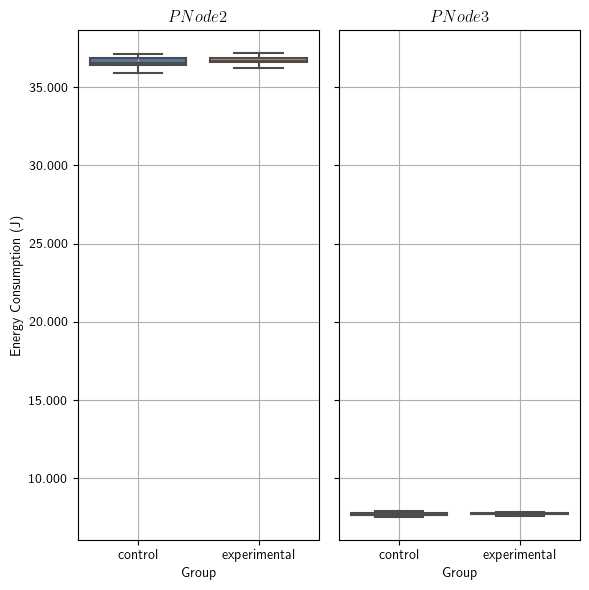

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(6, 6), sharey=True)

# Plot for Node 2
sns.boxplot(x='group', y='cicd_server_joules_consumption', data=pc2_no_outliers,
            ax=axes[0], linewidth=1.5, palette='deep', showfliers=False)
axes[0].set_title('$PNode2$')
axes[0].set_xlabel('Group')
axes[0].set_ylabel('Energy Consumption (J)')
axes[0].grid(True)

sns.boxplot(x='group', y='monitoring_pc_joules_consumption', data=pc2_no_outliers,
            ax=axes[1], linewidth=1.5, palette='deep', showfliers=False)
axes[1].set_title('$PNode3$')
axes[1].set_xlabel('Group')
axes[1].set_ylabel('')

axes[1].set_ylim(axes[0].get_ylim())
axes[1].grid(True)

axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{x:,.0f}'.replace(',', '*').replace('.', ',').replace('*', '.')))
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{x:,.0f}'.replace(',', '*').replace('.', ',').replace('*', '.')))

plt.tight_layout()
plt.savefig('no-outliers-2-3.pdf', dpi=300)
plt.show()

Data PC1 without outliers

In [19]:
print("Control; CI/CD; Std", pc1_no_outliers_c['cicd_server_joules_consumption'].std())
print("Control; Monitoring; Std", pc1_no_outliers_c['monitoring_pc_joules_consumption'].std())
print()
print("Control; CI/CD; Mean", pc1_no_outliers_c['cicd_server_joules_consumption'].mean())
print("Control; Monitoring; Mean", pc1_no_outliers_c['monitoring_pc_joules_consumption'].mean())
print()
print("Experimental; CI/CD; Std", pc1_no_outliers_e['cicd_server_joules_consumption'].std())
print("Experimental; Monitoring; Std", pc1_no_outliers_e['monitoring_pc_joules_consumption'].std())
print()
print("Experimental; CI/CD; Mean", pc1_no_outliers_e['cicd_server_joules_consumption'].mean())
print("Experimental; Monitoring; Mean", pc1_no_outliers_e['monitoring_pc_joules_consumption'].mean())

Control; CI/CD; Std 331.5787712216921
Control; Monitoring; Std 99.93791282487226

Control; CI/CD; Mean 18766.319784511612
Control; Monitoring; Mean 5456.031287078789

Experimental; CI/CD; Std 217.13033634823702
Experimental; Monitoring; Std 100.44525972373398

Experimental; CI/CD; Mean 18685.973398878512
Experimental; Monitoring; Mean 5432.8177078094595


Data PC2 without outliers

In [20]:
print("Control; CI/CD; Std", pc2_no_outliers_c['cicd_server_joules_consumption'].std())
print("Control; Monitoring; Std", pc2_no_outliers_c['monitoring_pc_joules_consumption'].std())
print()
print("Control; CI/CD; Mean", pc2_no_outliers_c['cicd_server_joules_consumption'].mean())
print("Control; Monitoring; Mean", pc2_no_outliers_c['monitoring_pc_joules_consumption'].mean())
print()
print("Experimental; CI/CD; Std", pc2_no_outliers_e['cicd_server_joules_consumption'].std())
print("Experimental; Monitoring; Std", pc2_no_outliers_e['monitoring_pc_joules_consumption'].std())
print()
print("Experimental; CI/CD; Mean", pc2_no_outliers_e['cicd_server_joules_consumption'].mean())
print("Experimental; Monitoring; Mean", pc2_no_outliers_e['monitoring_pc_joules_consumption'].mean())

Control; CI/CD; Std 330.08387187015967
Control; Monitoring; Std 89.1905915449583

Control; CI/CD; Mean 36590.07334312571
Control; Monitoring; Mean 7681.978386822691

Experimental; CI/CD; Std 266.1399275638024
Experimental; Monitoring; Std 69.64623179859831

Experimental; CI/CD; Mean 36718.88156227577
Experimental; Monitoring; Mean 7697.744288671801
